<a href="https://colab.research.google.com/github/COFAlumni-USB/Physics-REBoot-Applied-Science-Bootcamp/blob/main/Resultados_Hands-On_Estudiantes/Epidemiologia_Delimar_Nanin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src='https://static.wixstatic.com/media/42c521_bbcac1847d1a46739c6ccb446a2be592~mv2.png/v1/fill/w_490,h_189,al_c,q_85,usm_0.66_1.00_0.01/20210730_website_header.webp' width="1000" />
</p>

<font size="6">Actividades Hand-Ons</font>


<font size="12">Modelaje matemático de epidemias</font>


# Modelo SIR

Actualmente nos encontramos en el 2021 después de estar 18 meses confinados a estar en casa debido a una enfermedad extremadamente contagiosa llamada COVID-19. 

A continuación se presenta el modelo matemático determinista **SIR** (**S**uceptible, **I**nfeccioso, **R**ecobrado)  desarrollado en el [1927 por W.O Kermack y A.G. McKendrick](https://doi.org/10.1098/rspa.1927.0118)


Este modelo describe la evolución temporal de una enfermedad considerando solamente 3 posibles estados para los individuos:

* **S(t)**: Representa a los individuos **Suceptibles**, es decir aquellas personas que pueden ser infectadas al entrar en contacto con la enfermedad.

* **I(t)**: Representa a los individuos **Infectados**, es decir aquellas personas portadoras de la enfermedad y que pueden contagiar a personas del grupo **S**.

* **R(t)**: Representa a los individuos **Recobrados**, es decir aquellas personas que ya fueron infectadas y se recobraron, es decir, que no estan en condiciones de transmitir la enfermedad ni de enfermarse nuevamente.

Las transiciones entre los grupos esta definidad de la siguiente manera:

$$ S \rightarrow I \rightarrow R$$

Una persona primero es suceptible a la enfermedad **S** luego se infecta **I** y por último, se recobra **R**.
La tasa de transmisión esta determinada por la constante $\beta$, la de recuperación por la constante $\gamma$.
 
Dada una población fija, $ N = S(t)+ I(t) + R(t) $, las 3 ecuaciones diferenciales presentadas a continuación, describen el modelo:

$$ \frac{dS}{dt}= -\beta S(t)I(t) $$

$$ \frac{dI}{dt}= \beta S(t)I(t) - \gamma I(t)$$

$$ \frac{dR}{dt}=  \gamma I(t)$$

En esta ocasión, nuestra tarea es:

* Crear nuestra propia implementación en Python del *modelo SIR* usando las ecuaciones diferenciales presentadas anteriormente para un período de tiempo de 100 dias.
* Ilustrar gráficamente la evolución de **S**, **I**, **T** en función del tiempo.

Existen varias maneras de realizar esto. Por ahora, pondremos en práctica los conocimientos aprendidos en **introducción a python**, **pensamiento algorítmico** así como las librerías **numpy** y **matplotlib**.


Empezemos por cargar las librerías que usaremos:

<div class="alert alert-block alert-info">

**Objetivo** : Importa las siguientes librerías y funciones
    
1. NumPy con pseudónimo np
2. La función odeint de scipy.integrate
3. Matplotlib.pyplot con pseudónimo plt

</div>
 

In [ ]:
#Importamos las librerias necesarias para resolver el problema
import numpy  as np #Libreria para trabajar con matrices
from scipy.integrate import odeint #Funcion para resolver ecuaciones diferenciales
import matplotlib.pyplot as plt #Libreria para graficar

<div class="alert alert-block alert-info">

**Objetivo** : Define los parámetros iniciales
    
*   Población total **N=1000**
*   Número inicial de personas infectadas **I0=1**
*   Número inicial de individuos recuperados **R0=0**
*   Número inicial de personas susceptibles **S0= N - I0 - R0**
*   La tasa de contacto esta definida por la constante $\beta=0.2$
*   La tasa de recuperación esta definida por la constante $\gamma= 1./10$ 

</div>
 

In [ ]:
#Definimos los parametros iniciales

total_poblacion= 1000 #Representa la poblacion total
infectadas= 1 #Numero inicial de personas infectadas
recuperadas= 0 #Numero inicial de personas recuperadas
susceptibles= total_poblacion - infectadas - recuperadas #Poblacion susceptible que resulta de restar la poblacion infectada y recuperada a la poblacion total
tasa_de_contacto= 0.2
tasa_de_recuperacion= 1/10

Ahora que definimos todos los parámetros iniciales, es necesario definir t, para describir la evolución temporal de la función. En este caso utilizamos la función np.linspace que produce un array con **Num** cantidad de puntos entre los valores **start** y **stop**.

In [ ]:
# Los argumentos de la funcion linspace son (start, stop, num) donde esto se traduce como t inicial, t final, num de puntos
# Creamos un parametro llamado Total_dias para indicar cuantos dias deseamos evaluar.
Total_dias = 100 #Dias totales del estudio de evolucion de epidemia

Puntos=  100 #Colocamos el mismo numero que en el parametro para tener un punto de datos cada dia

# Inicializamos el array 1D:
t = np.linspace(0, Total_dias, Puntos)

El modelo SIR esta representado por un sistema de ecuaciones diferenciales. Para resolverlo es necesario definir las funciones del modelo (como vector) y el vector de condiciones iniciales de la siguiente manera:

\begin{equation}
\vec{Y}(t) =  \begin{bmatrix}
           S \\
           I \\
           R
         \end{bmatrix}
\end{equation}        

\begin{equation}
 \vec{f}(t, \vec{Y}) =  \begin{bmatrix}
           \frac{\text{d}S}{\text{d} T} = -\beta S(t)I(t) \\
           \frac{\text{d}I}{\text{d} T} = \beta S(t)I(t) - \gamma I(t)\\
           \frac{\text{d}R}{\text{d} T} = \gamma I(t)
         \end{bmatrix} 
\end{equation}    

\begin{equation}
 \vec{Y}(t_o) =  \begin{bmatrix}
           S(t_o) = S0 \\
           I(t_o) = I0\\
           R(t_o) = R0
         \end{bmatrix} 
\end{equation}

In [ ]:
# En vez de resolver todo en el codigo definimos aparte la funcion Y
def modelo_sir(y, t,tasa_de_contacto, tasa_de_recuperacion, total_poblacion): #primero definimos la funcion a resolver y la variable independiente, luego colocamos las constantes
    #Vector y
    S, I, R= y[0], y[1], y[2] #El vector y se representa por tenemos en su posicion 0 a los susceptibles (S), posicion 1 a los infectados (I) y en posicion 2 a los recuperados (R)

    #Derivadas respectivas de S, I y R
    
    dsusceptibles= (-tasa_de_contacto*S*I)/total_poblacion
    dinfectados= (tasa_de_contacto*S*I)/total_poblacion - tasa_de_recuperacion*I
    drecuperados= tasa_de_recuperacion*I
    
    # utilizamos el comando return para que nos devuelva un vector con las funciones como coordenadas (separadas por una coma)
    
    return [dsusceptibles, dinfectados, drecuperados]

# Ahora hacemos un vector con las condiciones iniciales definidas al principio
y0= np.array([susceptibles, infectadas, recuperadas])

¡Lo único que queda por hacer es resolver las ecuaciones diferenciales! pero esto lo podemos hacer automáticamente con la función ***scipy.integrate.odeint** or ***scipy.integrate.solve_ivp**, esta función ya la importamos al comienzo.


In [ ]:
ret = odeint(modelo_sir, y0, t, args=(tasa_de_contacto, tasa_de_recuperacion, total_poblacion))
S, I, R= ret.T

Ahora hacemos los gráficos y ¡listo!

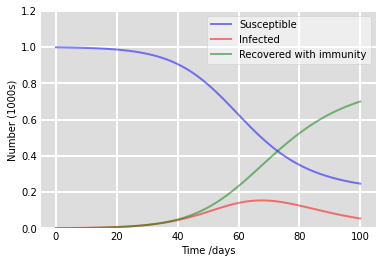

In [ ]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible') #Variable de susceptibles vs t
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected') # Variable de infectados vs t
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity') #Variable de recuperados vs t

ax.set_xlabel('Time /days') #titulo del eje X
ax.set_ylabel('Number (1000s)') #titulo eje y
ax.set_ylim(0,1.2) #min z max del eje Y
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'): 
    ax.spines[spine].set_visible(False)
    
plt.show()

# Modelo SEIR

El modelo SEIR divide la población en 4 categorías en vez de 3. 
Las definiciones de los grupos **S**, **I**, **R** permanecen como en la sección anterior, la diferencia es que se introduce un nuevo grupo **E** el cual representa las personas expuestas, las cuales son portadores de la enfermedad pero no presentan síntomas. En este caso la transición de un grupo a otro esta dada por:

$ S \rightarrow E \rightarrow I \rightarrow R$

Una persona primero es suceptible a la enfermedad **S** luego se contagia y se encuentra en período de incubación asociado con su respectiva tasa $\alpha$ pasando al grupo de personas expuestas **E** antes de infectarse y pasar al grupo **I** y por último, se recobra **R**.
 
Es posible agregar al modelo las tasas de natalidad $\nu$ y mortalidad $\mu$. En este caso, la población total **N** no es constante $ N(t) = S(t)+ E(t) + I(t) + R(t) $. En vez de tener 3 ecuaciones diferenciales tenemos 4:

$ \frac{dS}{dt}= -\beta S(t)I(t) + \nu N(t) - \mu S(t) $

$ \frac{dE}{dt}= \beta S(t)I(t) - \alpha E(t) - \mu E(t)$

$ \frac{dI}{dt}= \alpha E(t) - \gamma I(t) -\mu I(t)$

$ \frac{dR}{dt}=  \gamma I(t) - \mu R(t)$

En esta ocasión, nuestra tarea es:

* Modificar la implementación en Python del *modelo SIER* usando las ecuaciones diferenciales presentadas anteriormente para un período de tiempo de 100 dias.
* Ilustrar gráficamente la evolución de **S**, **I**, **E**, **R**, **N** en función del tiempo.

Procedemos de la misma manera que con el ejercicio anterior, ya que las funciones y librerías a ser utilizadas son las mismas:

In [ ]:
import numpy  as np #Libreria para trabajar con matrices
from scipy.integrate import odeint #Funcion para resolver ecuaciones diferenciales
import matplotlib.pyplot as plt #Libreria para graficar

<div class="alert alert-block alert-info">

**Objetivo** : Repetir
    
Hay que repetir los pasos realizados durante el caso de modelo SIR ahora en el modelo SEIR.

</div>
 

Definimos las nuevas constantes presentes en el nuevo set de ecuaciones, las cuales son:

- tasa de infección: $\beta$ 

- tasa de recuperación: $\gamma$

- tasa de mortalidad: $ \mu$

- tasa de natalidad: $ \nu $

- tasa de incubación: $ \alpha_1$

Además, definimos una población inicial de N=1000, así como el número inicial de personas expuestas **E0=0**, infectadas **I0=1** y recuperadas **R0=0**. Todas las demas personas pertenecen al grupo suceptible: **S0= N - E0 - I0 - R0**

Finalmente, definimos el grid que en este caso es el eje X el cual consiste en los dias. 

In [ ]:
#Definicion de constantes:
## tasa de infeccion, recuperacion, mortalidad, natalidad, incubacion
tasaInfeccion= 0.6
tasaRecuperacion= 0.5
tasaMortalidad= 0.2
tasaNatalidad= 0.1
tasaIncubacion= 0.14
#Condiciones iniciales:
poblacion= 1000 #Poblacion inicial
## Numero inicial de personas expuestas, infectadas y recuperadas
infectados, expuestos, recuperados= 1, 0, 0
#Lo variable de los susceptibles sera igual a la poblacion menos los expuesto, infectados y recuperados.
susceptibles0= poblacion - expuestos - infectados - recuperados
## Tiempo, puntos de datos (in days)
Tamano_grid = 100 #Dias totales
Step = 100 #Tomamos el mismo valor del Tamano_grid para evaluar por dia la epidemia
tiempo = np.linspace(0, Tamano_grid, Step) #Funcion para determinar el tiempo (t)

Ahora, después de definir todas las constantes y condiciones iniciales, construimos una función la cual engloba todas las ecuaciones diferenciales del modelo SEIR presentado anteriormente. En el argumento de la función se define primero y, t, luego todas las constantes. No importa que ahora sean 4 ecuaciones en vez de 3.

In [ ]:
# Ecuaciones diferenciales del Modelo SIER.
def modelo_seir(y, tiempo, tasaNatalidad, tasaInfeccion, tasaIncubacion, tasaMortalidad, tasaRecuperacion, poblacion):
    #Vector y
    S2, I2, E2, R2= y[0], y[1], y[2], y[3] #El vector y estara represantado por S2, I2, E2, R2
    #Ecuaciones diferenciales
    ds= tasaNatalidad*poblacion - tasaInfeccion*S2*I2/poblacion - tasaMortalidad*S2
    de= tasaInfeccion*S2*I2/poblacion - tasaMortalidad*E2 - tasaIncubacion*E2
    di= tasaIncubacion*E2- tasaRecuperacion*I2 - tasaMortalidad*I2
    dr= tasaRecuperacion*I2 - tasaMortalidad*R2
    return ds, de, di, dr

Ahora construimos el vector de condiciones iniciales y "llamamos" a la función, cuyo resultado decidimos nombrar **ret** para obtener las integrales de **dSdt, dEdt, dIdt, dRdt** en función del tiempo.

In [ ]:
# Vector de conditiones iniciales
yinicial = susceptibles0, expuestos, infectados, recuperados

# Integracion de las ecuaciones SIER en funcion del tiempo.
ret = odeint(modelo_seir, yinicial, tiempo, args=(tasaIncubacion,tasaInfeccion,tasaMortalidad,tasaNatalidad, tasaRecuperacion, poblacion))
S2, E2, I2, R2= ret.T 

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Finalmente hacemos el gráfico y ¡listo!



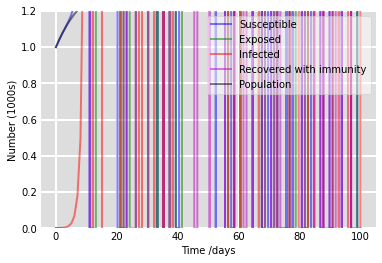

In [ ]:
# Plot de los 5 grupos en curvas separadas
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S2/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E2/1000, 'g', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I2/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R2/1000, 'm', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (S2+E2+I2+R2)/1000, 'k', alpha=0.5, lw=2, label='Population')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
plt.show()

# Comentario final

In [ ]:
#libs summary
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'IPython.core.shadowns',
 'numpy',
 'matplotlib.pyplot',
 'types']

**Autor**: M.T.Barrera

**Colaborador**: A. Figueroa, M. Morgado

**Fecha**: Agosto 2021